In [1]:
#generating both 2 moon and 2 circles datasets from scratch
#2 moon dataset


In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#then we import the make moons function from sklearn library to generate the dataset
from sklearn.datasets import make_moons


In [3]:
#now we make moons dataset with a total of 100 samples and the noise of std=0.1 as per the documentation as below
X,y=make_moons(n_samples=100,noise=0.1)

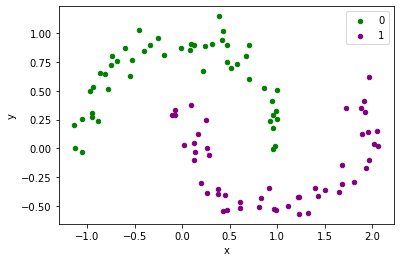

In [4]:
#now we have the moon dataset generated,next up we can plot it for better visualization

#there we go

df=pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
colors={0:'green',1:'purple'}
figure,ax=plt.subplots()
grouped_df=df.groupby('label')
for i,j in grouped_df:
  j.plot(ax=ax,kind='scatter',x='x',y='y',label=i,color=colors[i])
plt.show()


In [5]:
#using sklearn train_test_split function to split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
target_var=df.label
df.drop(['label'],axis=1,inplace=True)
y=target_var
x=df

In [6]:
###next up is generating the 2 circles dataset
#we import the following libraries
#pandas,numpy,seaborn,matplotlib as for the make moon datasets above
#since we already imported the libraries above ,the only different function we need to impo
#import is the make circles function from the sklearn library as below
from sklearn.datasets import make_circles

In [7]:
#lets now generate the circles dataset with 200 samples and noise as 0.1 as per the documentation
X1,y1=make_circles(n_samples=200,noise=0.1,factor=.3)   #you can run a samples of higher value(say 1000) for better circles concentration visualization

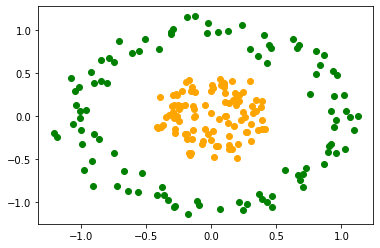

In [8]:
# #lets plot the 2 circles dataset for better visualization
df1=pd.DataFrame(dict(x=X1[:,0],y=X1[:,1],label=y1))
c1 = X1[y1==0]
c2  = X1[y1==1]

plt.figure()
plt.scatter(c1[:, 0], c1[:, 1], color='green')
plt.scatter(c2[:, 0], c2[:, 1], color='orange')
plt.show()

In [9]:
#splitting the circles dataset for training and testing  using the sklearn train test split function
from sklearn.model_selection import train_test_split
target1_var=df1.label
df1.drop(['label'],axis=1,inplace=True)
y1=target1_var
x=df1

In [11]:
####now that we have the 2 datasets ready to go,,next thing we need to do for both datasets is that we need to 
#find a parameter setting on both datasets for which the kernel PCA will successfully separate the data 
#2 clusters or basically what we call components
#so how do we go about it?  
#we proceed as below

In [12]:
#our main task now is to know how implement the kernel PCA function which we gonna be using to seperate the datasets into 2 clusters
#and investigate where it succeeds and fails
#we can as well use the sklearn kernelPCA function to perfom the same operation (from sklearn.decomposition import KernelPCA)
#buh in this case i gonna prefer the implementation from scratch so as make it easy inspect what parameter setting the method succeeds
# and fails

In [13]:
#importing some important libraries
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from scipy import exp
def kernel_pca_func(X, gamma_value, n_components):
    squared_distances = pdist(X, 'sqeuclidean')  #calculating the pairwise squared euclidean distances  
    matrix_square_distances = squareform(squared_distances)    #converting the distances into a square matrix
    H = exp(-gamma_value * matrix_square_distances)    
    n_val = H.shape[0]  #getting the center of the matrix
    n = np.ones((n_val,n_val)) / n_val
    H = H - n.dot(H) - H.dot(n) + n.dot(H).dot(n)    
    eigenvalues, eigenvectors = eigh(H)  #centered matrix eigenpairs
    eigenvalues, eigenvectors = eigenvalues[::-1], eigenvectors[:, ::-1]    
    stacked_val = np.column_stack([eigenvectors[:, i] for i in range(n_components)])    
    return stacked_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


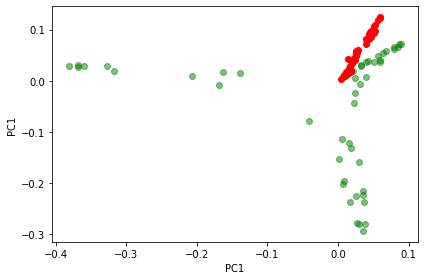

In [14]:
##separating the 2 moon dataset
kernel_PCA_X = kernel_pca_func(X, gamma_value=20, n_components=2) #setting the parameter gamma to 1 will not work buh with 15 we can roll
plt.scatter(kernel_PCA_X[y==0, 0], kernel_PCA_X[y==0, 1],color='green', alpha=0.5)
plt.scatter(kernel_PCA_X[y==1, 0], kernel_PCA_X[y==1, 1],color='red' )
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.tight_layout()
plt.show()

In [15]:
#so actually under these above  parameter setting the separation actually succeeds

#we next gonna obtain some other parameter setting for which this separation fails as below


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


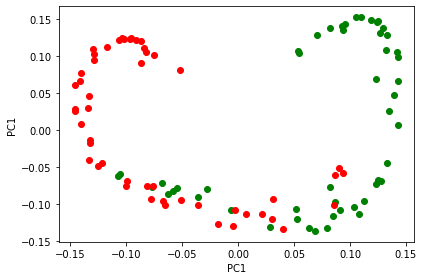

In [16]:
#we next gonna obtain some other parameter setting for which this separation fails as below
##separating the 2 moon dataset
kernel_PCA_X = kernel_pca_func(X, gamma_value=2, n_components=2) #setting the parameter gamma to 1 will not work buh with 15 we can roll
plt.scatter(kernel_PCA_X[y==0, 0], kernel_PCA_X[y==0, 1],color='green')
plt.scatter(kernel_PCA_X[y==1, 0], kernel_PCA_X[y==1, 1],color='red')
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.tight_layout()
plt.show()

In [17]:
#so with the above parameter setting the separation fails for the 2 moon dataset

In [18]:
###we gonna do the same for the 2 circles dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


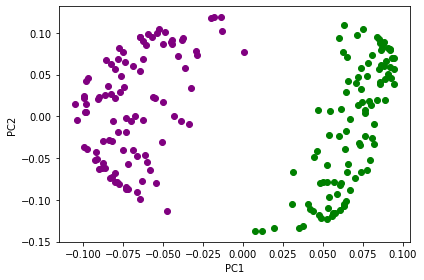

In [19]:

##separating the 2 circles dataset
kernel_PCA_X2 = kernel_pca_func(X1, gamma_value=2, n_components=2)##we will be altering the gamma value to set the parameter in a way that the separation
#actually succeeds and likewise fails
plt.scatter(kernel_PCA_X2[y1==0, 0], kernel_PCA_X2[y1==0, 1],color='green')
plt.scatter(kernel_PCA_X2[y1==1, 0], kernel_PCA_X2[y1==1, 1],color='purple')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [20]:
#with the above parameter setting the separation succeeds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


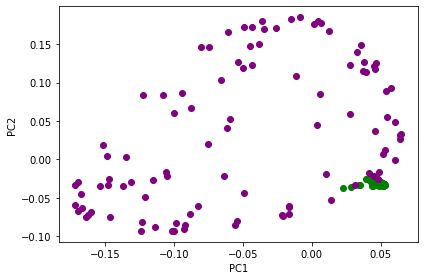

In [21]:
#we see similarly a parameter setting for which the 2-circles-dataset separation fails
kernel_PCA_X2 = kernel_pca_func(X1, gamma_value=12, n_components=2)##we will be altering the gamma value to set the parameter in a way that the separation
#actually succeeds and likewise fails
plt.scatter(kernel_PCA_X2[y1==0, 0], kernel_PCA_X2[y1==0, 1],color='green')
plt.scatter(kernel_PCA_X2[y1==1, 0], kernel_PCA_X2[y1==1, 1],color='purple')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [22]:
#reasons for failure
#the major reason why the kernlPca fails to attain good data separation is simply because this function does not
#take class labels as defined in generation of the datasets into account, meaning that if one has to use this kernelPCA 
#to compute the reconstruction error  which is used as a models measure of perfomance ,then this will not work since the kernelPCA is 
#not comparable between different kernels .i.e different kernels corresponds to different target spaces

END OF IMPLEMENTATION AND TESTING . THANK YOU!!!